In [1]:
from data import CLEAN_SOLD_HOUSE_PRICES
import pandas as pd
import numpy as np

from sklearn.neighbors import KernelDensity
from scipy.interpolate import griddata
from numpy import linspace
import matplotlib.pyplot as plt

In [2]:
sellprices_df = pd.read_csv(CLEAN_SOLD_HOUSE_PRICES)

/tmp/ipykernel_14953/209520228.py:1: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  sellprices_df = pd.read_csv(CLEAN_SOLD_HOUSE_PRICES)


In [3]:
sellprices_df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,...,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude
0,2022-1,2022-01-03,1,Vente,55000.0,13.0,RUE DE LA LIBERTE,2280,1000.0,1053,...,1,2.0,Appartement,24.0,1.0,NaN,NaN,NaN,5.218706,46.198054
1,2022-2,2022-01-03,1,Vente,143000.0,NaN,CHAMP COCHET,B010,1480.0,1398,...,0,NaN,NaN,NaN,NaN,S,sols,84.0,4.847867,46.000617
2,2022-2,2022-01-03,1,Vente,143000.0,NaN,CHAMP COCHET,B010,1480.0,1398,...,0,NaN,NaN,NaN,NaN,S,sols,88.0,4.847920,46.000576
3,2022-2,2022-01-03,1,Vente,143000.0,98.0,RTE DE LA DOMBES,0055,1480.0,1398,...,1,2.0,Appartement,140.0,3.0,NaN,NaN,NaN,4.848345,46.000585
4,2022-3,2022-01-04,1,Vente,300.0,NaN,AUX PIERRES,B031,1480.0,1243,...,0,NaN,NaN,NaN,NaN,T,terres,510.0,4.747627,46.045434


In [5]:
sellprices_df.describe()

,numero_disposition,valeur_fonciere,adresse_numero,code_postal,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,2.941500e+06,2.941500e+06,1.783361e+06,2.941429e+06,2.941500e+06,1.687895e+06,1.257695e+06,1.686046e+06,2.451609e+06,2.941500e+06,2.941500e+06
mean,1.061120e+00,6.901011e+05,6.839759e+02,4.966004e+04,2.558304e-01,2.018594e+00,1.152671e+02,2.354721e+00,2.624595e+03,2.086957e+00,4.637165e+01
std,4.956496e-01,5.751301e+06,1.914959e+03,2.690103e+04,7.801443e-01,9.473681e-01,6.746991e+02,2.091689e+00,1.436453e+04,5.354565e+00,4.925846e+00
min,1.000000e+00,1.100000e-01,1.000000e+00,1.000000e+03,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-6.314872e+01,-2.138505e+01
25%,1.000000e+00,6.600000e+04,8.000000e+00,2.900000e+04,0.000000e+00,1.000000e+00,5.000000e+01,0.000000e+00,2.420000e+02,1.512285e-01,4.484348e+01
50%,1.000000e+00,1.655000e+05,2.400000e+01,4.700000e+04,0.000000e+00,2.000000e+00,7.500000e+01,2.000000e+00,5.940000e+02,2.239268e+00,4.689560e+01
75%,1.000000e+00,3.170000e+05,9.700000e+01,7.500500e+04,0.000000e+00,3.000000e+00,1.050000e+02,4.000000e+00,1.552000e+03,4.077039e+00,4.860660e+01
max,9.600000e+01,7.225900e+08,9.999000e+03,9.749000e+04,1.880000e+02,4.000000e+00,2.517250e+05,9.000000e+01,4.625500e+06,5.582591e+01,5.108207e+01


In [4]:
len(sellprices_df)

2941500

# Add price by square meter

In [3]:
df = sellprices_df.copy()
df["m2_price_bati"] = df["valeur_fonciere"] / df["surface_reelle_bati"]
df["m2_price_terrain"] = df["valeur_fonciere"] / df["surface_terrain"]

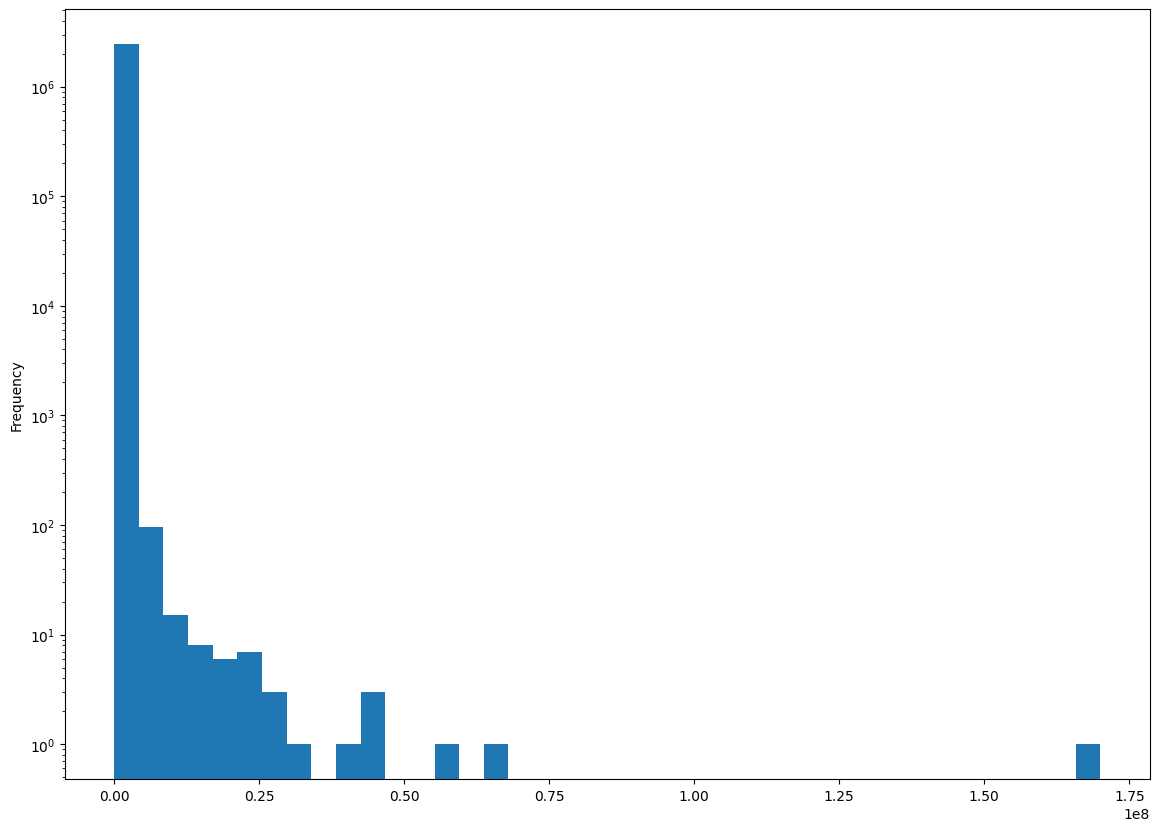

In [8]:
ax = df["m2_price_terrain"].plot.hist(figsize=(14,10), bins=40)
ax.set_yscale('log')

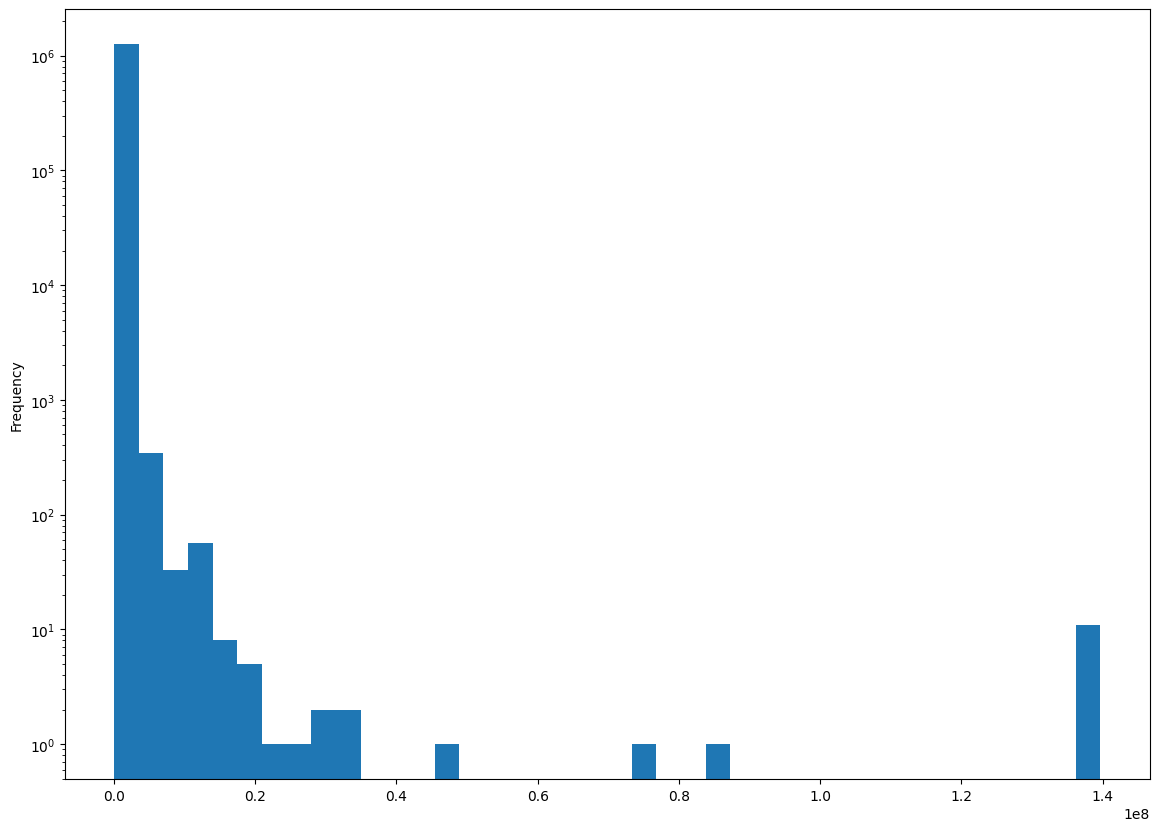

In [7]:
ax = df["m2_price_bati"].plot.hist(figsize=(14,10), bins=40)
ax.set_yscale('log')

<Axes: ylabel='Frequency'>

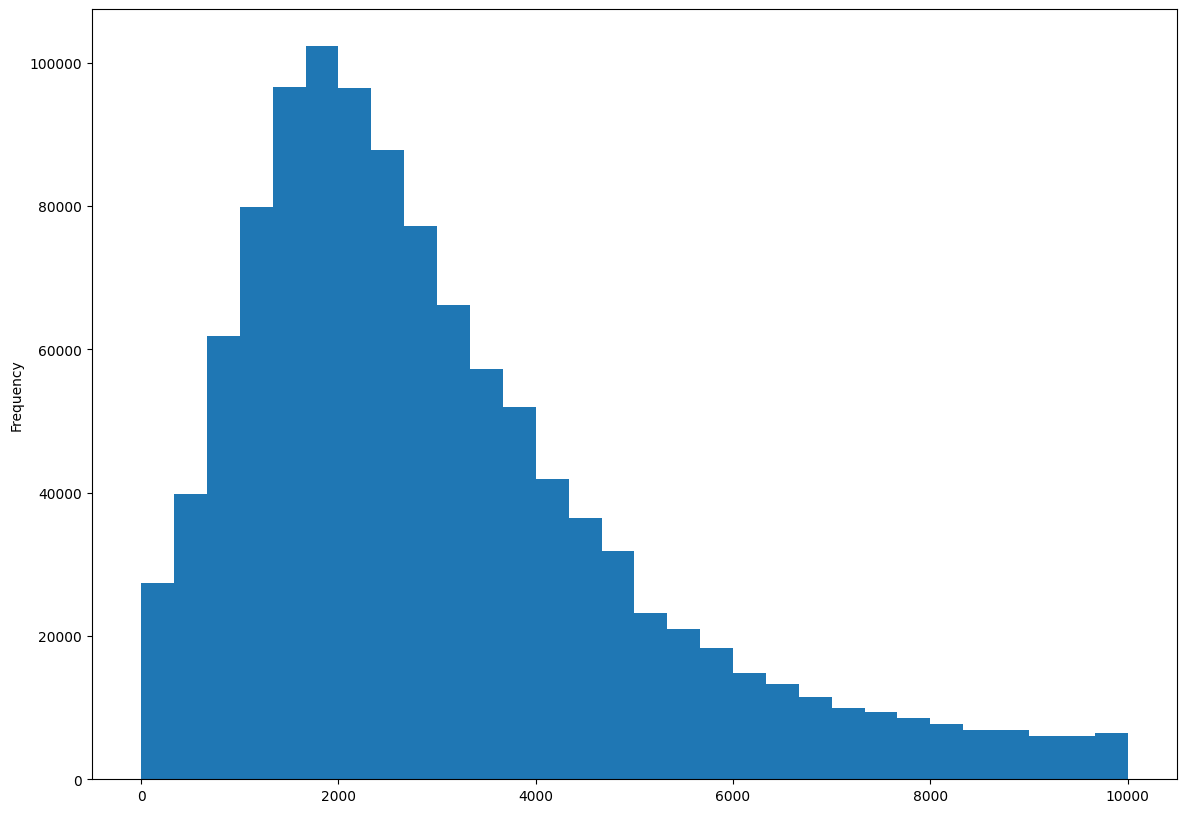

In [9]:
df[df["m2_price_bati"] <= 1e4]["m2_price_bati"].plot.hist(figsize=(14,10), bins=30)

# Save to csv

In [10]:
df[["m2_price_bati", 
    "m2_price_terrain", 
    "surface_reelle_bati", 
    "surface_terrain", 
    "valeur_fonciere", 
    "longitude", 
    "latitude"]].to_csv("../data/m2_price.csv")

TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]

In [ ]:
df[(df["m2_price_bati"] <= 1e4 | df["m2_price_terrain"] <= 1e4)].to_csv("../data/m2_price_upto1e4.csv")

# Heatmap creation

## KDE in spherical coordinates

It simply shows the kernel density estimate of observed data points in geospatial coordinates. Computing KDE in spherical coordinates

Neighbors-based query (in particular a kernel density estimate) on geospatial data, using a Ball Tree built upon the Haversine distance metric – i.e. distances over points in latitude/longitude.

* https://scikit-learn.org/stable/auto_examples/neighbors/plot_species_kde.html#sphx-glr-auto-examples-neighbors-plot-species-kde-py
* https://scikit-learn.org/stable/modules/density.html


In [12]:
grid_size = 0.5
lat_min, lat_max, lon_min, lon_max = 42.5, 51.1, -5.2, 8.2

xgrid = np.arange(lat_min, lat_max, grid_size)
ygrid = np.arange(lon_min, lon_max, grid_size)

X, Y = np.meshgrid(xgrid, ygrid[::-1])
xy = np.vstack([X.ravel(), Y.ravel()]).T

xy *= np.pi / 180.0

len(xy)

486

In [40]:
xi = linspace(lat_min, lat_max, 100) * np.pi / 180.0
yi = linspace(lon_min, lon_max, 100) * np.pi / 180.0

z = df["m2_price"].to_numpy()
y = df["latitude"].to_numpy() * np.pi / 180.0
x = df["longitude"].to_numpy() * np.pi / 180.0

zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

TypeError: Input z must be 2D, not 1D

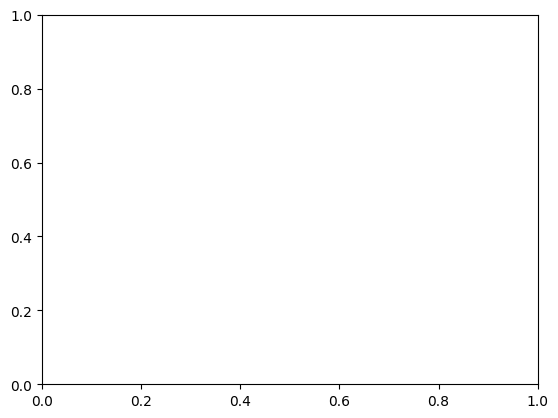

In [32]:
plt.contourf(xi, yi, zi, range(5000, int(np.nanmax(zi)) + 100, 100), cmap = plt.cm.jet)

In [14]:
kde = KernelDensity(bandwidth=0.04, metric="haversine", kernel="gaussian", algorithm="ball_tree")

x_train = df[["latitude", "longitude"]].to_numpy()
x_weights = df["m2_price"]

kde.fit(np.radians(x_train), sample_weight=x_weights.to_numpy())

KernelDensity(algorithm='ball_tree', bandwidth=0.04, metric='haversine')

In [17]:
Z = np.exp(kde.score_samples(xy))

In [18]:
xyZ = np.hstack([xy, Z.reshape(-1,1)])
xyZ_df = pd.DataFrame(xyZ, columns=["latitude", "longitude", "price_by_m2"])
xyZ_df["latitude"] *= 180.0 / np.pi
xyZ_df["longitude"] *= 180.0 / np.pi

# export array to CSV file
xyZ_df.to_csv("../data/m2_price_heatmat.csv", index=False)

## Interpolating a bivariate spline on spherical coordinates `SmoothSphereBivariateSpline`

If your data is given in spherical coordinates, $r = r(\theta, \phi)$,

`SmoothSphereBivariateSpline` and `RectSphereBivariateSpline` provide convenient analogs of `SmoothBivariateSpline` and `RectBivariateSpline`, respectively.

These classes ensure the periodicity of the spline fits for
* $ \theta \in [0, \pi] $ and,
* $ \phi \in [0, 2 \pi] $
 
and offer some control over the continuity at the poles.

> This routine constructs spline knot vectors automatically via the FITPACK
> algorithm. The spline knots may be placed away from the data points. For
> some data sets, this routine may fail to construct an interpolating spline,
> even if one is requested via ``s=0`` parameter. In such situations, it is
> recommended to use `bisplrep` / `bisplev` directly instead of this routine
> and, if needed, increase the values of ``nxest`` and ``nyest`` parameters
> of `bisplrep`.

I tried with a few examples and it seems the problem SmoothSphereBivariateSpline faces is the memory scaling. 

So if we have too many points on our grid it will memory overflow. This seems to be a more flexible method suitable for points irregularly dropped on sphere instead of regular grid like ours.

In [345]:
df_log = df[(df["latitude"] < 51.2) & (df["latitude"] > 42.2) & (df["longitude"] < 9.1) & (df["longitude"] > -4.5)].reset_index(drop=True)
df_log = df_log[(df_log["m2_price"] < 1e3)].reset_index(drop=True)

df_log["rounded_latitude"] = df_log["latitude"].apply(lambda x: round(x, 3))
df_log["rounded_longitude"] = df_log["longitude"].apply(lambda x: round(x, 3))

df_log = df_log.groupby(["rounded_latitude", "rounded_longitude"])["m2_price"].mean().reset_index()

# df_log["m2_price_log"] = df_log["m2_price"].apply(np.log).reset_index(drop=True)
# df_log = df_log[(df_log["m2_price_log"] < 11.0) & (df_log["m2_price_log"] > 4.0)].reset_index(drop=True)
# df_log = df_log[(df_log["m2_price"] < 4e3)].reset_index(drop=True)

# data_std = df_log["m2_price"].std()
# data_mean = df_log["m2_price"].mean()
# data = ((df_log["m2_price"] - data_mean) / data_std).to_numpy()

data = df_log["m2_price"].to_numpy()


thetas = (df_log["rounded_latitude"].to_numpy() + 90.0) * (np.pi / 180.0)
phis = (df_log["rounded_longitude"].to_numpy() + 180.0) * (np.pi / 180.0)


<Axes: >

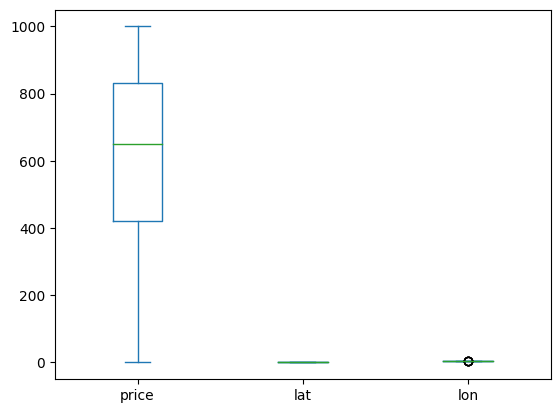

In [346]:
pd.DataFrame({"price": data, "lat": thetas,"lon": phis }).plot.box()

## Fit a bivariate spline on spherical coordinates `LSQSphereBivariateSpline`

Weighted least-squares bivariate spline approximation in spherical coordinates.

Determines a smoothing bicubic spline according to a given set of knots in the `theta` and `phi` directions.

> If the input data is such that input dimensions have incommensurate units and differ by many orders of magnitude, the interpolant may have numerical artifacts. Consider rescaling the data before interpolating.

In [347]:
from scipy.interpolate import LSQSphereBivariateSpline

fine_lats = np.linspace(thetas.min(), thetas.max(), 50)
fine_lons = np.linspace(phis.min(), phis.max(), 50)

lats, lons = np.meshgrid(fine_lats, fine_lons)

knotst, knotsp = fine_lats.copy(), fine_lons.copy()

knot_cst = .0001

knotst[0] += knot_cst
knotst[-1] -= knot_cst
knotsp[0] += knot_cst
knotsp[-1] -= knot_cst

lut = LSQSphereBivariateSpline(thetas, phis, data, knotst, knotsp)


<Axes: >

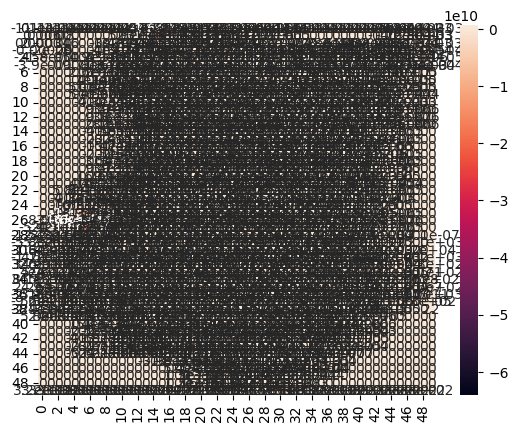

In [348]:
import seaborn as sns
data_smth = lut(fine_lats, fine_lons, dtheta=0, dphi=0)

sns.heatmap(data_smth, annot=True)


In [344]:
pd.DataFrame(data_smth).describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,...,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-9.643049e+05,-3.747831e+05,-8.429724e+04,1.069056e+05,29845.685885,2.157920e+07,8.641611e+07,1.538353e+07,-1.896361e+06,5.445377e+07,...,-1.134591e+06,-3.891521e+06,-2.655458e+07,-7.160867e+07,5.695593e+07,1.889193e+07,-4.157892e+06,-1.199154e+06,-8.220853e+04,8.246651e+04
std,3.331620e+06,2.254192e+06,4.605960e+05,5.954182e+05,135545.598726,1.105046e+08,4.424679e+08,1.162684e+08,1.256968e+08,5.234793e+08,...,4.445246e+06,1.885814e+07,1.287226e+08,4.519243e+08,6.048984e+08,1.606384e+08,2.622817e+07,7.264234e+06,4.051276e+05,4.143898e+05
min,-1.783221e+07,-1.490054e+07,-2.738657e+06,-5.399335e+05,-20234.707792,-2.105720e+07,-8.426258e+07,-1.472091e+08,-3.822379e+08,-1.256891e+09,...,-2.534541e+07,-1.207592e+08,-8.406288e+08,-3.033458e+09,-1.092571e+09,-2.731423e+08,-1.786777e+08,-4.970658e+07,-2.722470e+06,-4.917939e+04
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-2.690920e+04,-1.520592e+04,-1.280239e+06,...,8.110305e+01,-3.993148e+03,-1.425522e+05,-4.550354e+06,-3.022945e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.642172e+03,...,2.330400e+03,1.074828e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,2.436167e+02,1187.013757,9.119892e+02,1.155616e+03,2.093998e+03,6.618477e+03,3.266400e+04,...,6.320856e+03,3.790175e+03,7.241594e+03,7.914582e+03,1.032348e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.050132e+05,2.391384e+06,9.963568e+05,3.958148e+06,904680.320703,7.457395e+08,2.986002e+09,7.582752e+08,6.742081e+08,3.267445e+09,...,1.224656e+06,1.538246e+07,8.748994e+07,3.497756e+08,3.925569e+09,1.030566e+09,1.388982e+07,2.012125e+06,1.014517e+04,2.799267e+06


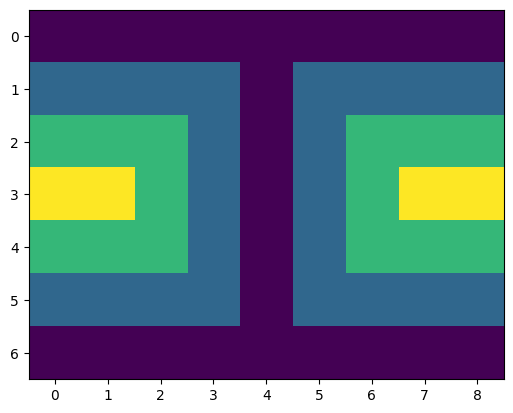

In [238]:
from scipy.interpolate import LSQSphereBivariateSpline
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, np.pi / 1000, num=7)
phi = np.linspace(0, 2*np.pi / 1000, num=9)
data = np.empty((theta.shape[0], phi.shape[0]))

data[:,0], data[0,:], data[-1,:] = 0., 0., 0.
data[1:-1,1], data[1:-1,-1] = 1., 1.
data[1,1:-1], data[-2,1:-1] = 1., 1.
data[2:-2,2], data[2:-2,-2] = 2., 2.
data[2,2:-2], data[-3,2:-2] = 2., 2.
data[3,3:-2] = 3.
data = np.roll(data, 4, 1)

lats, lons = np.meshgrid(theta, phi)

knotst, knotsp = theta.copy(), phi.copy()

knotst[0] += .0001
knotst[-1] -= .0001
knotsp[0] += .0001
knotsp[-1] -= .0001

lut = LSQSphereBivariateSpline(lats.ravel(), lons.ravel(), data.T.ravel(), knotst, knotsp)

data_orig = lut(theta, phi)
plt.imshow(data_orig, interpolation='nearest')

## Projecting before approximation

In [11]:
# https://geopandas.org/en/stable/docs/user_guide/projections.html
# https://towardsdatascience.com/visualizing-spatial-data-with-geojson-heatmaps-1fbe2063ab86
# https://gis.stackexchange.com/questions/394154/using-geometry-points-to-get-data-in-order-to-plot-heatmap
import geopandas



In [4]:
df_terrain = df.dropna(subset=["m2_price_terrain"]).reset_index(drop=True)
df_terrain = df_terrain[(df_terrain["latitude"] < 51.2) & (df_terrain["latitude"] > 42.2) & (df_terrain["longitude"] < 9.1) & (df_terrain["longitude"] > -4.5)].reset_index(drop=True)

In [28]:

df_terrain["rounded_latitude"] = df_terrain["latitude"].apply(lambda x: round(x, 1))
df_terrain["rounded_longitude"] = df_terrain["longitude"].apply(lambda x: round(x, 1))

df_terrain_gr = df_terrain.groupby(["rounded_latitude", "rounded_longitude"], as_index=False)["m2_price_terrain"].mean()

In [58]:
# Extracting x,y and values (z)
z = df_terrain_gr["m2_price_terrain"].apply(np.log)
y = df_terrain_gr["rounded_latitude"]
x = df_terrain_gr["rounded_longitude"]

# Interpolating values to get better coverage
xi = linspace(x.min(),x.max(), 1)
yi = linspace(y.min(),y.max(), 1)
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear', rescale=True)

# Creating contour plot with a step size of 1000
step_size=1
cs = plt.contourf(xi, yi, zi,
                  range(0, int(np.nanmax(zi)) + step_size, step_size),
                  cmap=plt.cm.jet)

/tmp/ipykernel_14953/2739424125.py:14: RuntimeWarning: All-NaN slice encountered
  range(0, int(np.nanmax(zi)) + step_size, step_size),


ValueError: cannot convert float NaN to integer

In [12]:
usa = geopandas.read_file("../data/m2_price.csv")

KeyboardInterrupt: 

In [ ]:

usa.crs


ax = usa.plot()

ax.set_title("WGS84 (lat/lon)");


usa = usa.to_crs("ESRI:102003")

ax = usa.plot()

ax.set_title("NAD 1983 Albers contiguous USA");